In [2]:
conda install -c conda-forge linearmodels

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/lu/Library/jupyterlab-desktop/jlab_server

  added / updated specs:
    - linearmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astor-0.8.1                |     pyhd8ed1ab_1          29 KB  conda-forge
    certifi-2025.4.26          |     pyhd8ed1ab_0         154 KB  conda-forge
    formulaic-1.1.1            |     pyhd8ed1ab_0          86 KB  conda-forge
    graphlib-backport-1.0.3    |     pyhd8ed1ab_0          10 KB  conda-forge
    interface_meta-1.3.0       |     pyhd8ed1ab_1          18 KB  conda-forge
    linearmodels-6.1           |  py312h3a11e2b_0        

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels.iv import IVGMM
from mpl_toolkits.mplot3d import Axes3D

In [13]:
import os

### Data Simulation

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n = 1000
X = np.random.normal(size=(n, 2))  # generate 2 normally dist indepedent variables
Z = np.random.normal(size=(n, 2))  # generate 2 instruments from normal dist
beta = np.array([2, -1])  # True coefficients
epsilon = np.random.normal(scale=0.5, size=n)  # Noise term
y = (X @ beta + epsilon).reshape(-1, 1)  # Dependent variable
# y.reshape(-1,1) convert y vecotr(1000,) into a (1000,1) matrix for proper checking

In [3]:
# prepare dataframe
data_matrix = np.hstack([X, Z, y])  # (1000, 5)
df = pd.DataFrame(data_matrix, columns=["x1", "x2", "z1", "z2", "y"])

# np.hstack: combine X,Z,y into a matrix

### Fitting the OSL model

In [4]:
X_ols = sm.add_constant(df[["x1", "x2"]])  # Add intercept
ols_model = sm.OLS(df["y"], X_ols)
ols_results = ols_model.fit()

### Fitting the GMM model

In [5]:
formula = "y ~ 1 + [ x1 + x2 ~ z1 + z2]"
gmm_model = IVGMM.from_formula(formula, df)
gmm_results = gmm_model.fit()

In [6]:
gmm_results

IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:                      y   R-squared:                      0.9199
Estimator:                     IV-GMM   Adj. R-squared:                 0.9198
No. Observations:                1000   F-statistic:                    0.5673
Date:                Fri, May 09 2025   P-value (F-stat)                0.7530
Time:                        21:38:01   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.0441     0.0877    -0.5028     0.6151     -0.2160      0.1278
x1             1.9427     3.9673     0.4897     0.6244     -5.8330      9.7184
x2            -0.6253     0.9306    -0.6719     0.5017     -2.4492      1.1987
==============================================================================

Endogenous: x1, x2
Instruments: z1, z2
GMM Covariance
Debiased: False
Robust (Heteroskedastic)
IVGMMResults, id: 0x131b0be60

In [16]:
save_dir = '/Users/lu/Desktop/AI_Economics/Finance_ML/figures'
os.makedirs(save_dir, exist_ok=True)

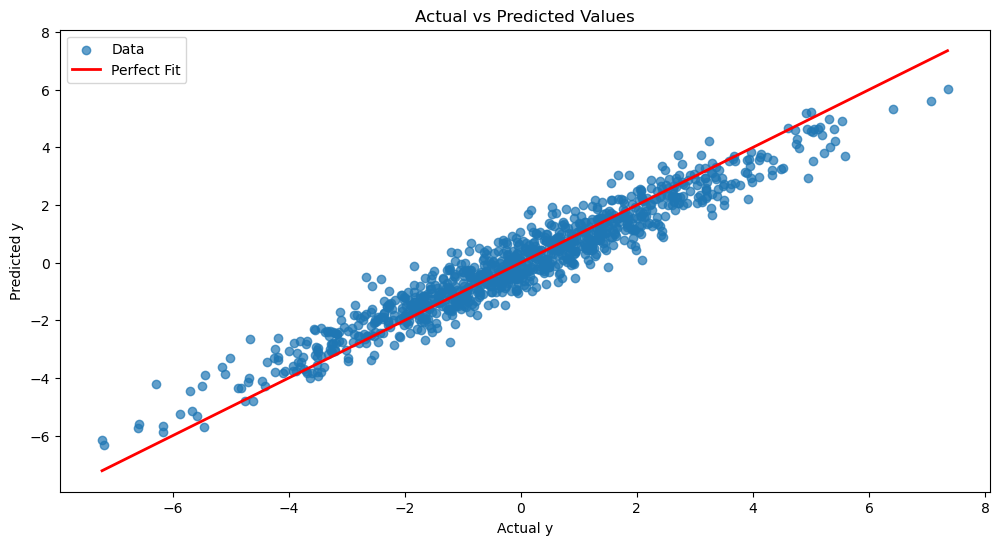

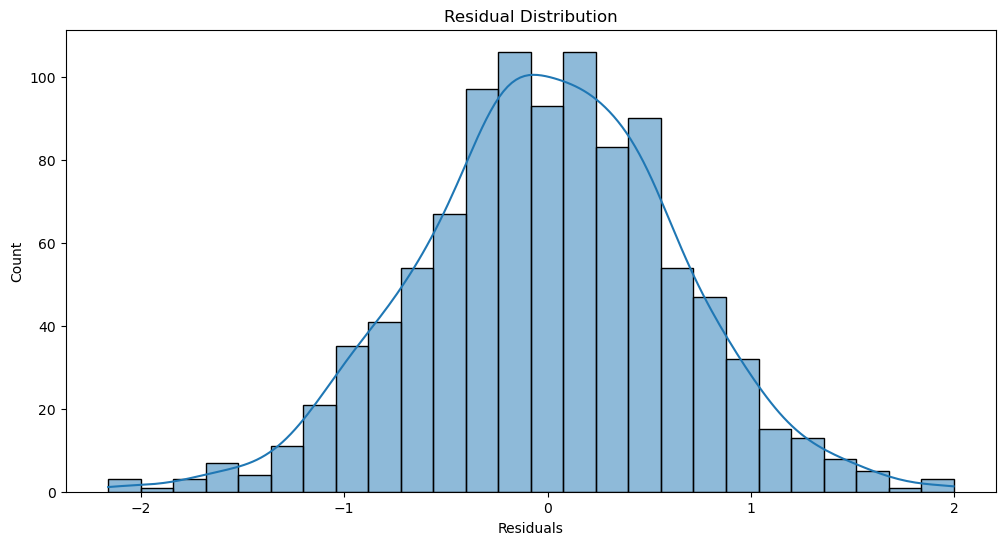

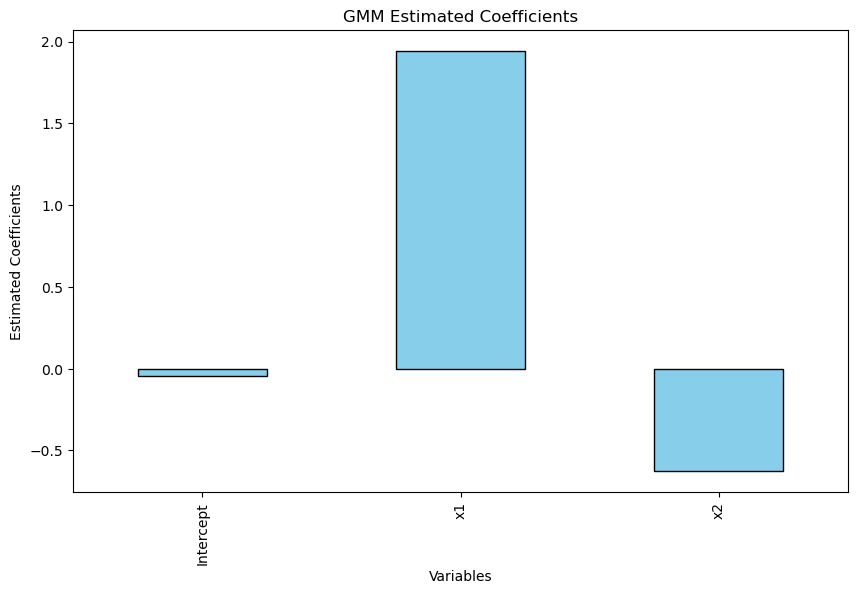

In [18]:
# Get predicted values and residuals
y_pred = gmm_results.fitted_values
residuals = gmm_results.resids

# 1. Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(df["y"], y_pred, alpha=0.7, label="Data")
plt.plot([min(df["y"]), max(df["y"])], [min(df["y"]), max(df["y"])], color="red", linewidth=2, label="Perfect Fit")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.legend()
plt.savefig(os.path.join(save_dir, "actual_vs_predicted_values.png"))
plt.show() # save first, then show to avoid blank issues
plt.close()  # Close the figure to avoid overlap or blank issues


# 2. Plot Residual Distribution
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.savefig(os.path.join(save_dir, "residual_distribution.png"))
plt.show()
plt.close()  # Close the figure to avoid overlap or blank issues


# 3. Plot Coefficients from GMM results
coefficients = gmm_results.params
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("GMM Estimated Coefficients")
plt.ylabel("Estimated Coefficients")
plt.xlabel("Variables")
plt.savefig(os.path.join(save_dir, "gmm_estimated_coefficients.png"))
plt.show()
plt.close()  # Close the figure to avoid overlap or blank issues
